In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

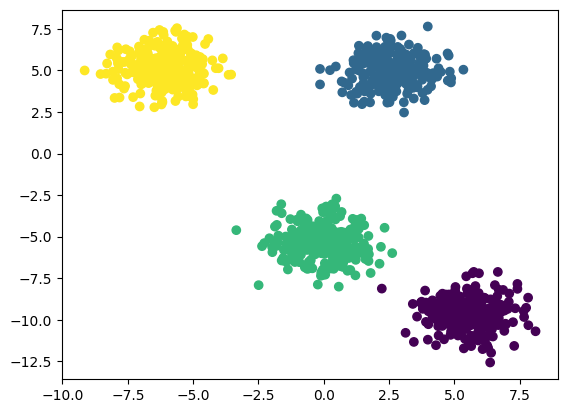

In [13]:
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=10)
plt.scatter(X[:, 0], X[:, 1], c=y)

### Standardization

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Elbow method to select K value

In [16]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
wcss

[1340.0000000000002,
 633.1306666813258,
 214.9908244603992,
 46.47193850601401,
 40.978368488404755,
 36.429279050659545,
 34.56519974633658,
 26.217482919233248,
 24.57523533521251,
 22.75237405077023]

### Plot Elbow Curve

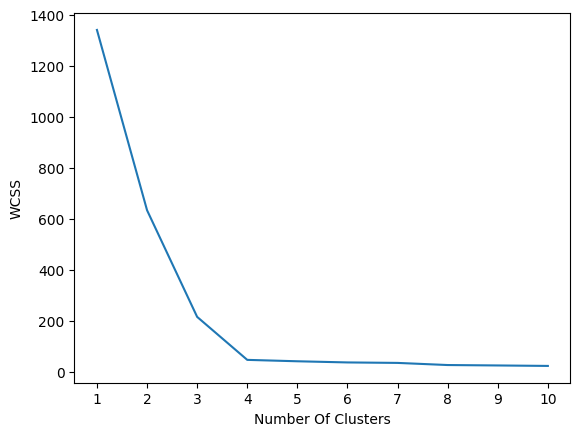

In [17]:
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

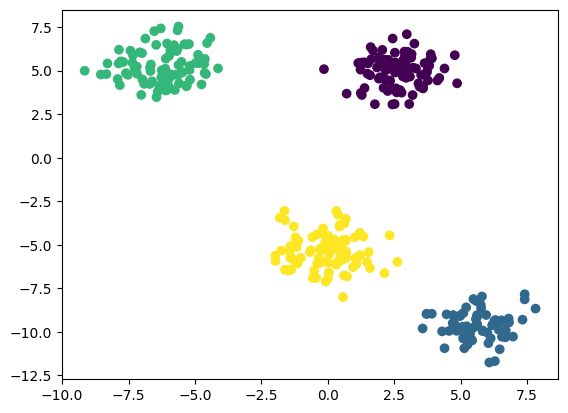

In [18]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(X_train_scaled)
y_pred = kmeans.predict(X_test_scaled)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)

## Validating the K value
- **Knee Locator**
- **Silhoutte Scoring**

### Knee Locator

In [19]:
!pip install kneed

In [20]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
kl.elbow

np.int64(4)

### Silhoutte Scoring

In [21]:
from sklearn.metrics import silhouette_score
silhoutte_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhoutte_coefficients.append(score)

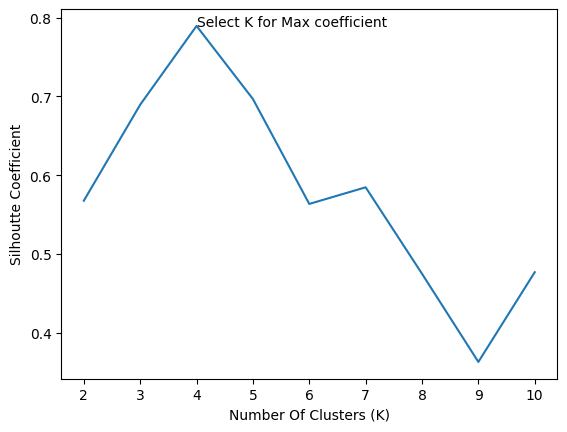

In [22]:
plt.plot(range(2, 11), silhoutte_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('Number Of Clusters (K)')
plt.ylabel('Silhoutte Coefficient')
plt.annotate(
    "Select K for Max coefficient",
    xy=(range(2, 11)[np.argmax(silhoutte_coefficients)], np.max(silhoutte_coefficients))
)
plt.show()